In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mobilenet_df = pd.read_csv("./results/mobilenetv3small-runs.csv")
efficientnet_df = pd.read_csv("./results/efficientnetv2b0-runs.csv")

mobilenet_test_df = pd.read_csv("./results/mobilenetv3small-test.csv")
efficientnet_test_df = pd.read_csv("./results/efficientnetv2b0-test.csv")

mobilenet_trainloss = pd.read_csv("results/loss-curves/mobilenetv3small-trainloss.csv")
efficientnet_trainloss = pd.read_csv(
    "results/loss-curves/efficientnetv2b0-trainloss.csv"
)

mobilenet_validloss = pd.read_csv("results/loss-curves/mobilenetv3small-validloss.csv")
efficientnet_validloss = pd.read_csv(
    "results/loss-curves/efficientnetv2b0-validloss.csv"
)

efficientnet_train_preds = pd.read_csv("./predictions/efficientnetv2b0-train-preds.csv")
mobilenet_train_preds = pd.read_csv("./predictions/mobilenetv3small-train-preds.csv")

efficientnet_valid_preds = pd.read_csv("./predictions/efficientnetv2b0-valid-preds.csv")
mobilenet_valid_preds = pd.read_csv("./predictions/mobilenetv3small-valid-preds.csv")

efficientnet_test_preds = pd.read_csv("./predictions/efficientnetv2b0-test-preds.csv")
mobilenet_test_preds = pd.read_csv("./predictions/mobilenetv3small-test-preds.csv")

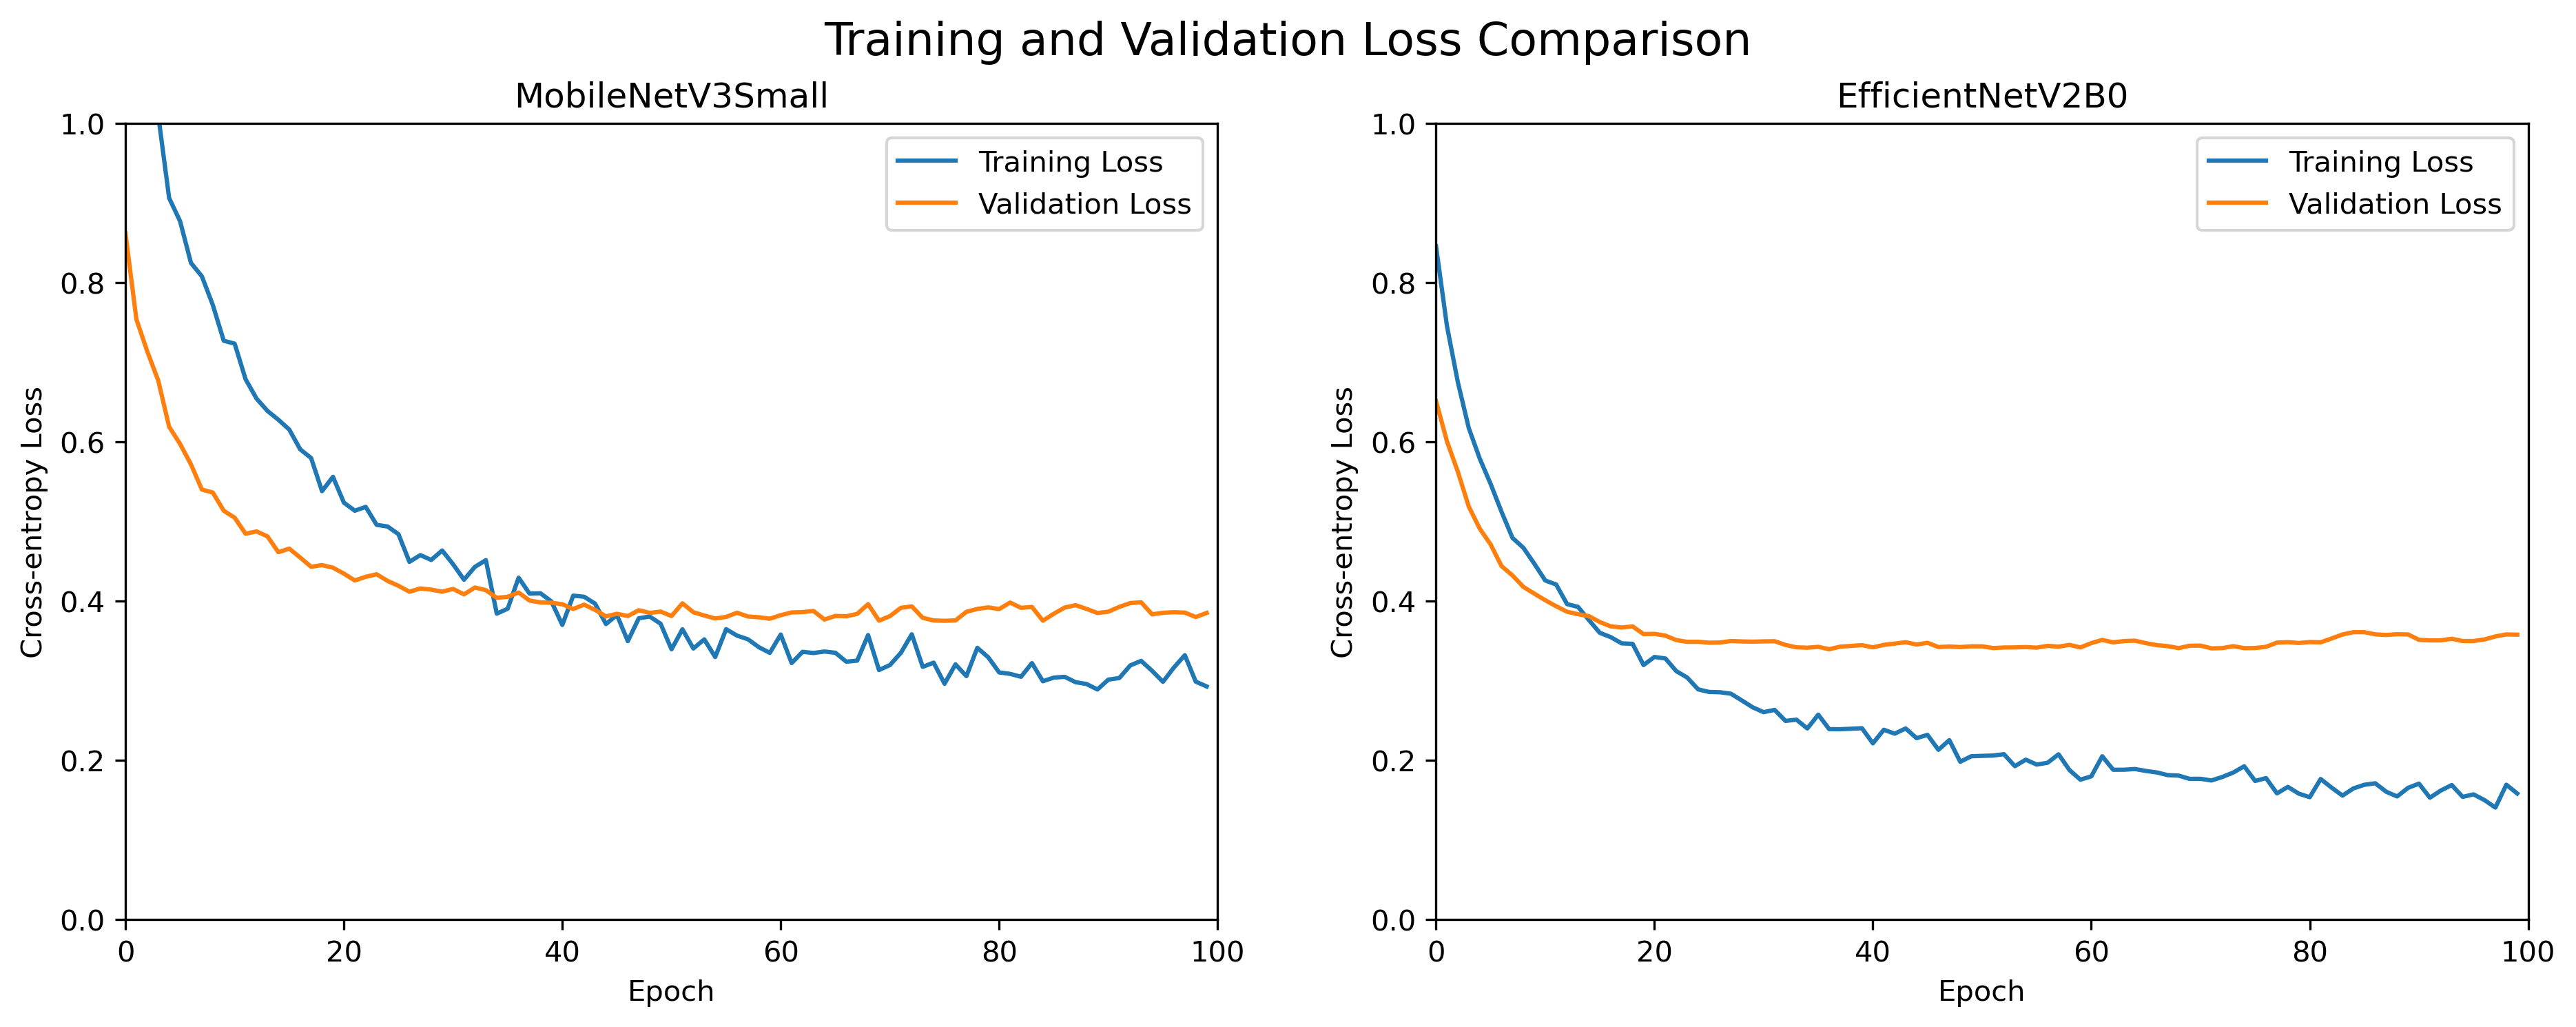

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=300, figsize=(15, 5))

ax1.plot(
    mobilenet_trainloss["Step"],
    mobilenet_trainloss["Grouped runs - loss"],
    label="Training Loss",
)
ax1.plot(
    mobilenet_validloss["Step"],
    mobilenet_validloss["Grouped runs - val_loss"],
    label="Validation Loss",
)

ax2.plot(
    efficientnet_trainloss["Step"],
    efficientnet_trainloss["Grouped runs - loss"],
    label="Training Loss",
)
ax2.plot(
    efficientnet_validloss["Step"],
    efficientnet_validloss["Grouped runs - val_loss"],
    label="Validation Loss",
)

ax1.set_xlabel("Epoch")
ax1.set_ylabel("Cross-entropy Loss")
ax1.set_title("MobileNetV3Small")
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 1)
ax1.legend()

ax2.set_xlabel("Epoch")
ax2.set_ylabel("Cross-entropy Loss")
ax2.set_title("EfficientNetV2B0")
ax2.set_xlim(0, 100)
ax2.set_ylim(0, 1)
ax2.legend()


plt.suptitle("Training and Validation Loss Comparison", fontsize=16)
plt.show()

In [4]:
# plot fnr using false_negatives / (true_positives + false_negatives)
mobilenet_df["fnr"] = mobilenet_df.apply(
    lambda row: row["false_negatives"]
    / (row["true_positives"] + row["false_negatives"]),
    axis=1,
)
efficientnet_df["fnr"] = efficientnet_df.apply(
    lambda row: row["false_negatives"]
    / (row["true_positives"] + row["false_negatives"]),
    axis=1,
)

# F1-Score


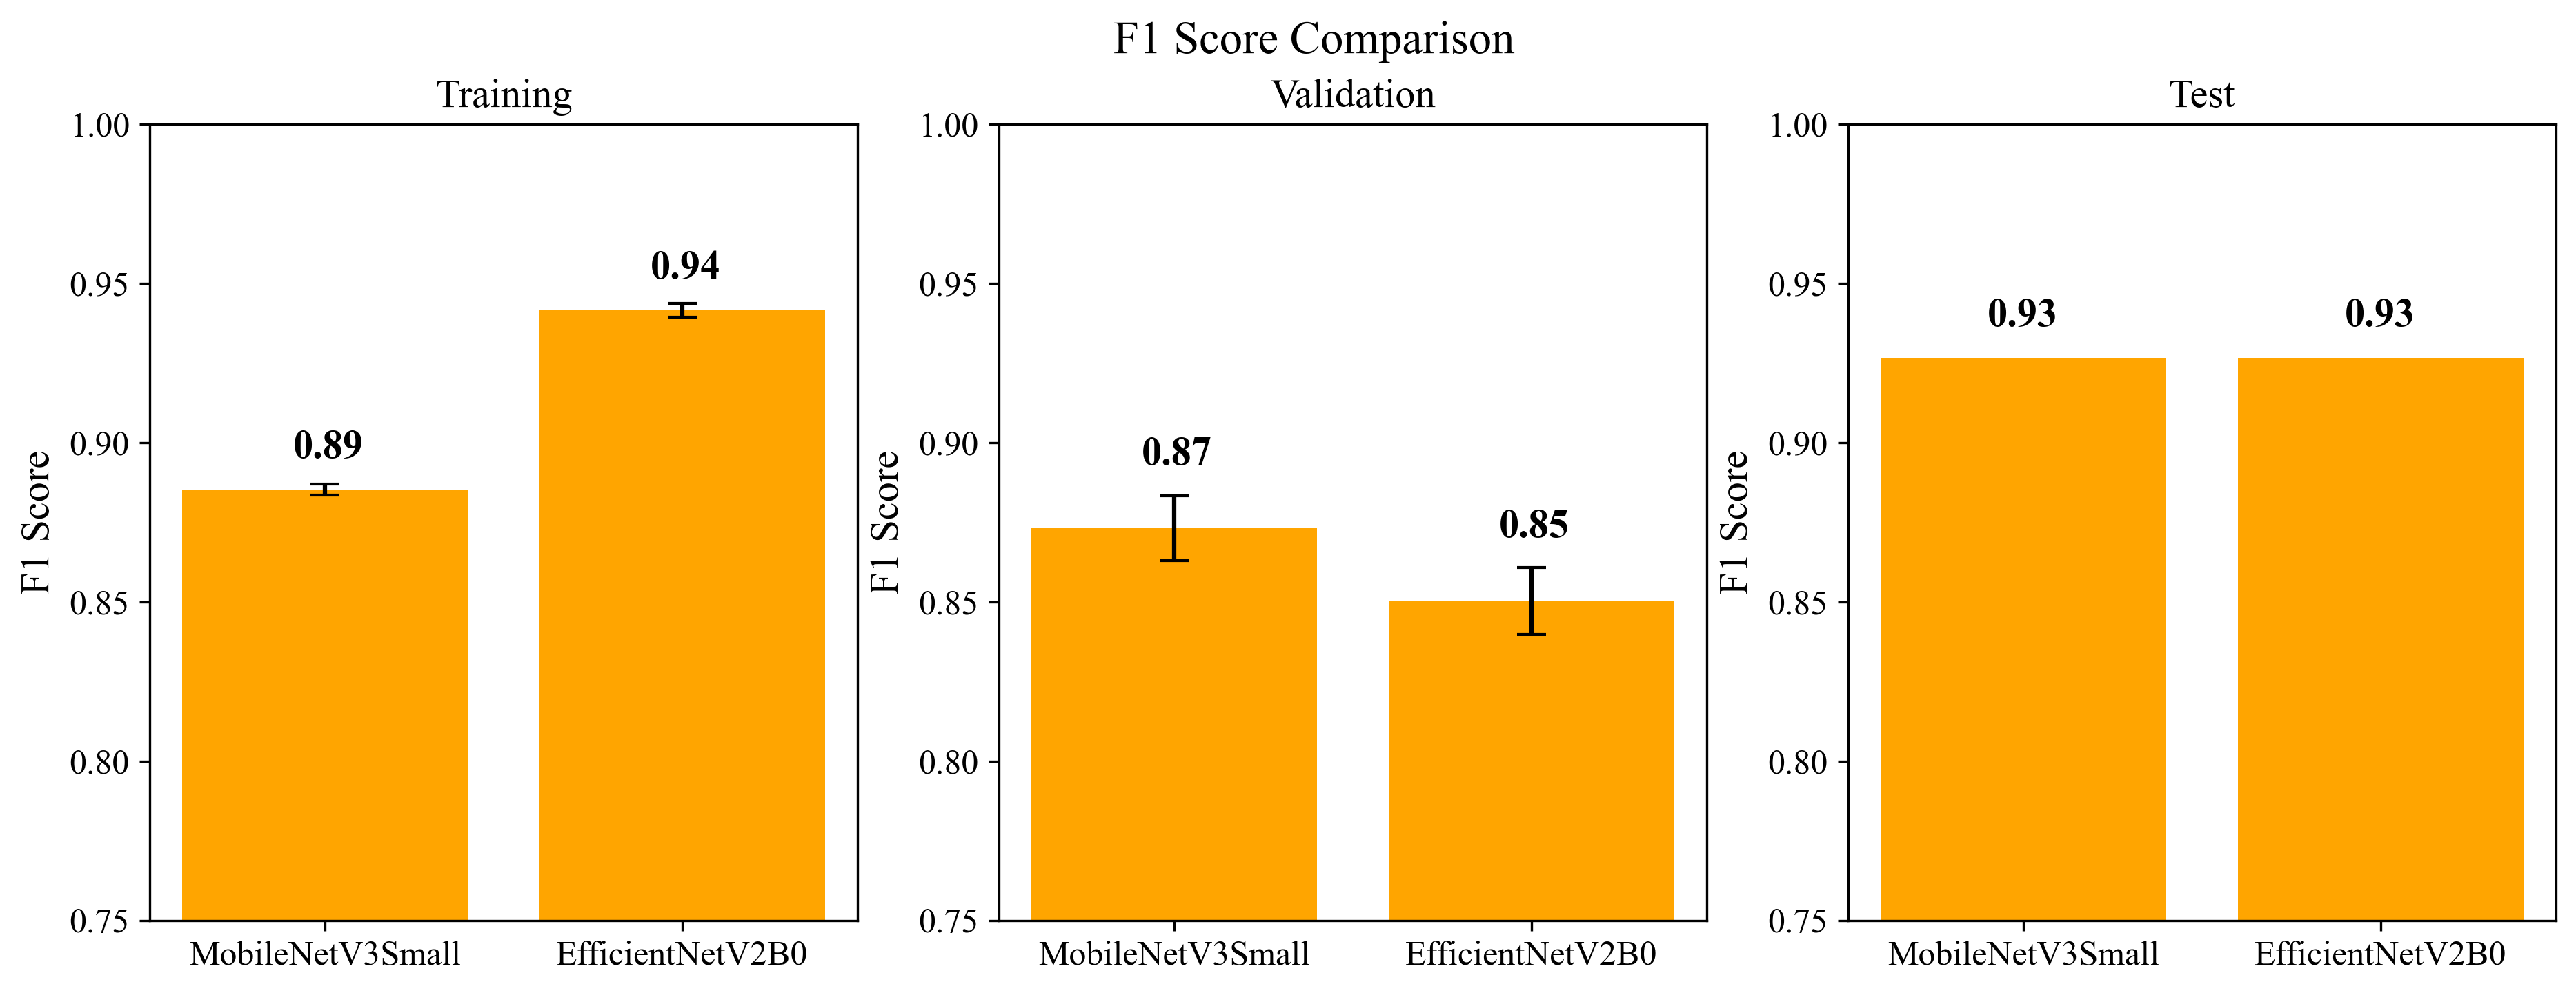

In [5]:
# make font readable on paper
plt.rcParams.update({"font.size": 12})
plt.rcParams["font.family"] = "Times New Roman"

# Plot two subplots for each model with each plot containing the average f1 score with error bars
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, dpi=300, figsize=(15, 5))
ax1.bar(
    ["MobileNetV3Small", "EfficientNetV2B0"],
    [mobilenet_df["f1_score"].mean(), efficientnet_df["f1_score"].mean()],
    yerr=[
        mobilenet_df["f1_score"].std(),
        efficientnet_df["f1_score"].std(),
    ],
    capsize=5,
    color="orange",
)

# place center scores on top of bars
for i, v in enumerate(
    [mobilenet_df["f1_score"].mean(), efficientnet_df["f1_score"].mean()]
):
    ax1.text(
        i - 0.09,
        v + 0.01,
        str(round(v, 2)),
        color="black",
        fontweight="bold",
        fontsize=14,
    )


ax1.set_title("Training", fontname="Times New Roman", fontsize=14)
ax1.set_ylabel("F1 Score", fontname="Times New Roman", fontsize=14)
ax1.set_ylim([0.75, 1])

ax2.bar(
    ["MobileNetV3Small", "EfficientNetV2B0"],
    [mobilenet_df["val_f1_score"].mean(), efficientnet_df["val_f1_score"].mean()],
    yerr=[
        mobilenet_df["val_f1_score"].std(),
        efficientnet_df["val_f1_score"].std(),
    ],
    capsize=5,
    color="orange",
)

# place center scores on top of bars
for i, v in enumerate(
    [mobilenet_df["val_f1_score"].mean(), efficientnet_df["val_f1_score"].mean()]
):
    ax2.text(
        i - 0.09,
        v + 0.02,
        str(round(v, 2)),
        color="black",
        fontweight="bold",
        fontsize=14,
    )

ax2.set_title("Validation", fontname="Times New Roman", fontsize=14)
ax2.set_ylabel("F1 Score", fontname="Times New Roman", fontsize=14)
ax2.set_ylim([0.75, 1])

# plot test f1 scores
ax3.bar(
    ["MobileNetV3Small", "EfficientNetV2B0"],
    [
        mobilenet_test_df["f1_score"].squeeze(),
        efficientnet_test_df["f1_score"].squeeze(),
    ],
    color="orange",
)
# place center scores on top of bars
for i, v in enumerate(
    [
        mobilenet_test_df["f1_score"].squeeze(),
        efficientnet_test_df["f1_score"].squeeze(),
    ]
):
    ax3.text(
        i - 0.1,
        v + 0.01,
        str(round(v, 2)),
        color="black",
        fontweight="bold",
        fontsize=14,
    )

ax3.set_title("Test", fontname="Times New Roman", fontsize=14)
ax3.set_ylabel("F1 Score", fontname="Times New Roman", fontsize=14)
ax3.set_ylim([0.75, 1])

fig.suptitle("F1 Score Comparison", fontname="Times New Roman", fontsize=16)
plt.show()

# FNR


In [6]:
mobilenet_df["fnr"] = mobilenet_df.apply(
    lambda row: row["false_negatives"]
    / (row["true_positives"] + row["false_negatives"]),
    axis=1,
)
efficientnet_df["fnr"] = efficientnet_df.apply(
    lambda row: row["false_negatives"]
    / (row["true_positives"] + row["false_negatives"]),
    axis=1,
)

mobilenet_df["val_fnr"] = mobilenet_df.apply(
    lambda row: row["val_false_negatives"]
    / (row["val_true_positives"] + row["val_false_negatives"]),
    axis=1,
)

efficientnet_df["val_fnr"] = efficientnet_df.apply(
    lambda row: row["val_false_negatives"]
    / (row["val_true_positives"] + row["val_false_negatives"]),
    axis=1,
)

mobilenet_test_df["fnr"] = mobilenet_test_df.apply(
    lambda row: row["false_negatives"]
    / (row["true_positives"] + row["false_negatives"]),
    axis=1,
)

efficientnet_test_df["fnr"] = efficientnet_test_df.apply(
    lambda row: row["false_negatives"]
    / (row["true_positives"] + row["false_negatives"]),
    axis=1,
)

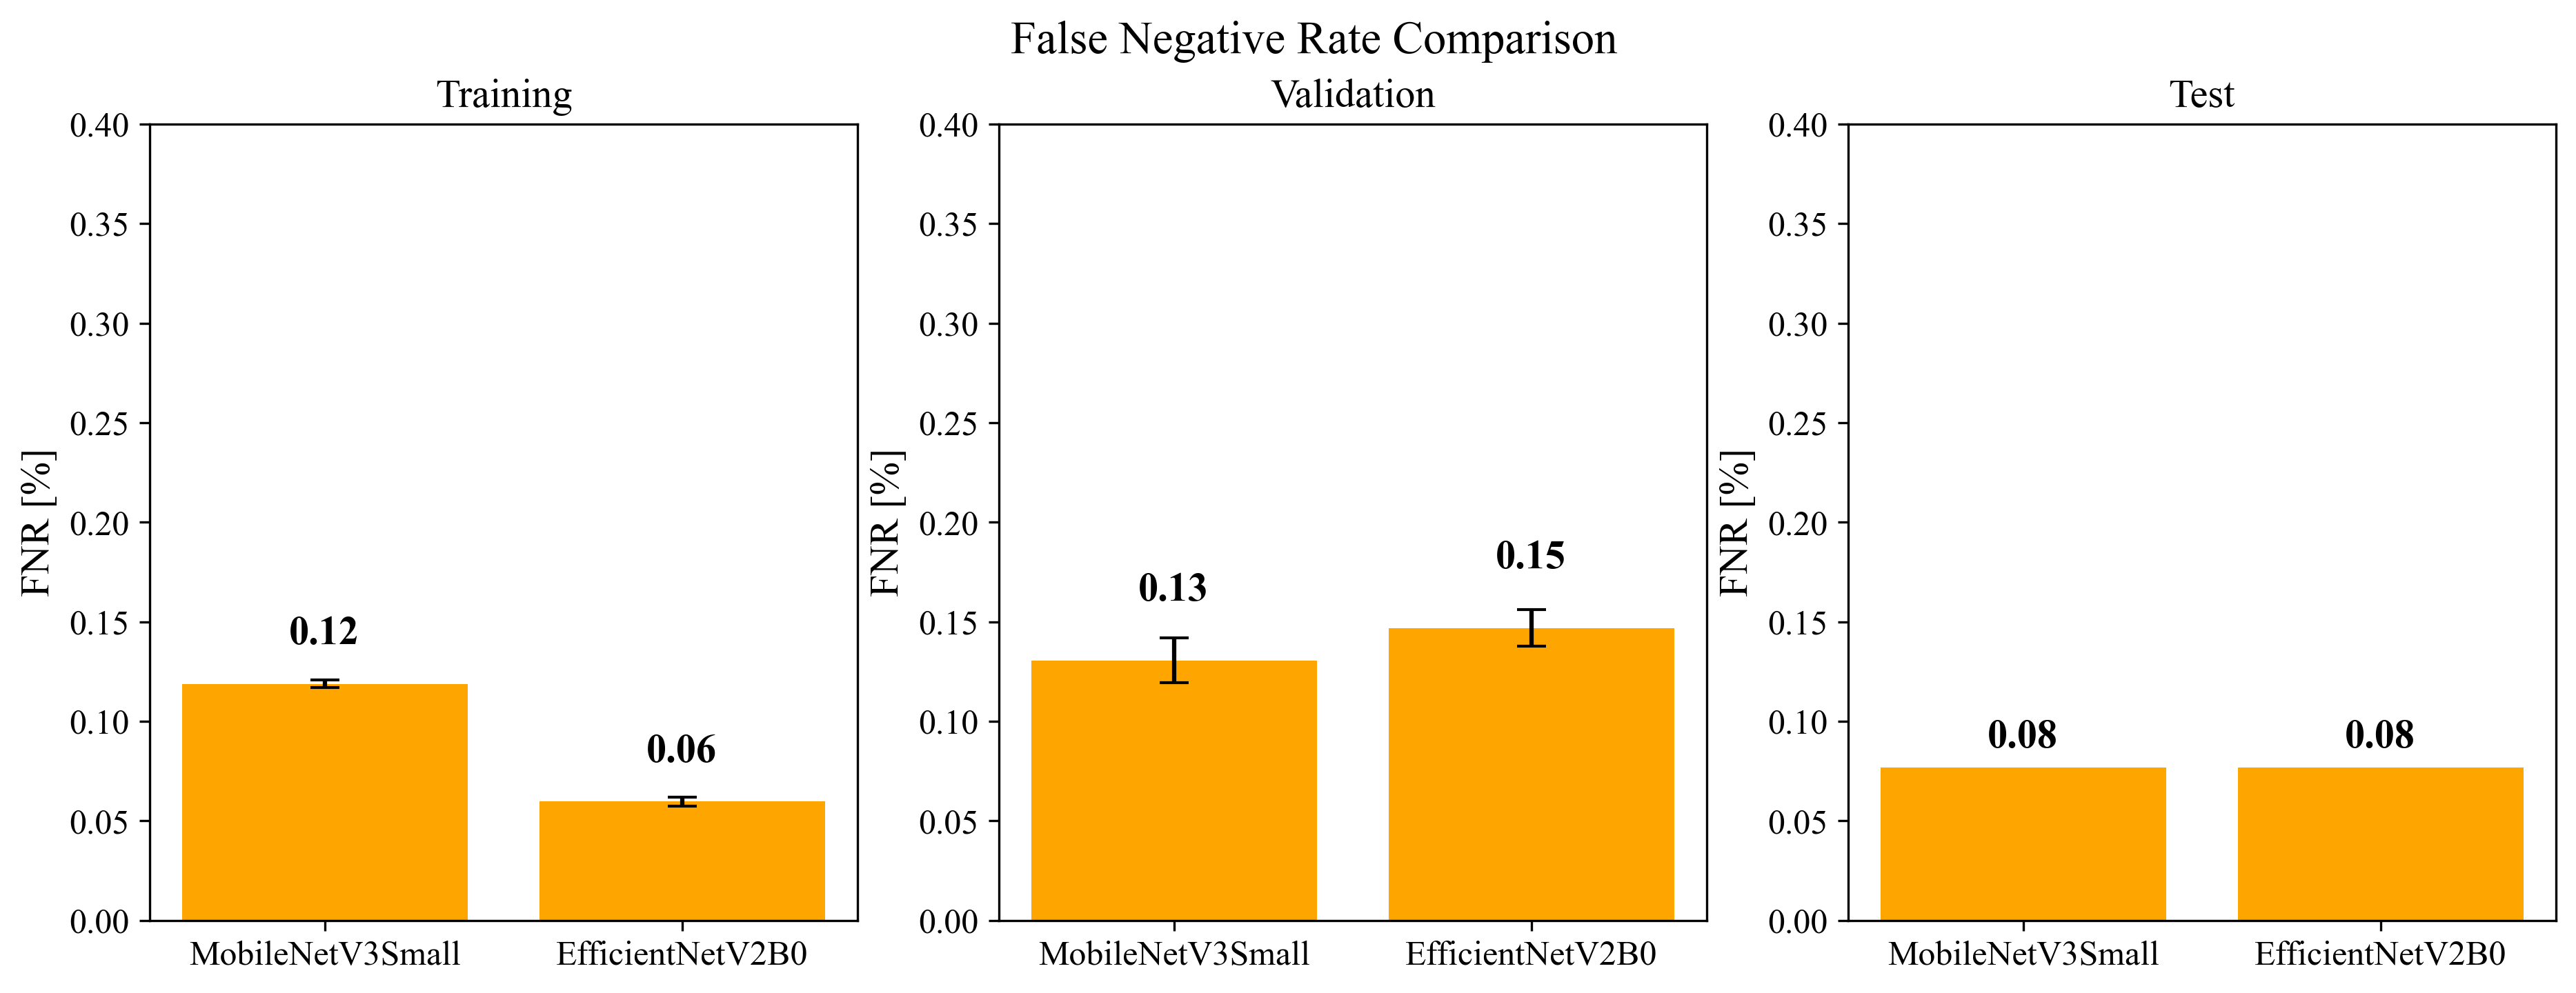

In [7]:
# Plot two subplots for each model with each plot containing the average f1 score with error bars
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, dpi=300, figsize=(15, 5))
ax1.bar(
    ["MobileNetV3Small", "EfficientNetV2B0"],
    [mobilenet_df["fnr"].mean(), efficientnet_df["fnr"].mean()],
    yerr=[
        mobilenet_df["fnr"].std(),
        efficientnet_df["fnr"].std(),
    ],
    capsize=5,
    color="orange",
)

# place center scores on top of bars
for i, v in enumerate([mobilenet_df["fnr"].mean(), efficientnet_df["fnr"].mean()]):
    ax1.text(
        i - 0.1,
        v + 0.02,
        str(round(v, 2)),
        color="black",
        fontweight="bold",
        fontsize=14,
    )


ax1.set_title("Training", fontname="Times New Roman", fontsize=14)
ax1.set_ylabel("FNR [%]", fontname="Times New Roman", fontsize=14)
ax1.set_ylim([0.0, 0.4])

ax2.bar(
    ["MobileNetV3Small", "EfficientNetV2B0"],
    [mobilenet_df["val_fnr"].mean(), efficientnet_df["val_fnr"].mean()],
    yerr=[
        mobilenet_df["val_fnr"].std(),
        efficientnet_df["val_fnr"].std(),
    ],
    capsize=5,
    color="orange",
)

# place center scores on top of bars
for i, v in enumerate(
    [mobilenet_df["val_fnr"].mean(), efficientnet_df["val_fnr"].mean()]
):
    ax2.text(
        i - 0.1,
        v + 0.03,
        str(round(v, 2)),
        color="black",
        fontweight="bold",
        fontsize=14,
    )

ax2.set_title("Validation", fontname="Times New Roman", fontsize=14)
ax2.set_ylabel("FNR [%]", fontname="Times New Roman", fontsize=14)
ax2.set_ylim([0.0, 0.4])

# plot test f1 scores
ax3.bar(
    ["MobileNetV3Small", "EfficientNetV2B0"],
    [
        mobilenet_test_df["fnr"].squeeze(),
        efficientnet_test_df["fnr"].squeeze(),
    ],
    color="orange",
)
# place center scores on top of bars
for i, v in enumerate(
    [
        mobilenet_test_df["fnr"].squeeze(),
        efficientnet_test_df["fnr"].squeeze(),
    ]
):
    ax3.text(
        i - 0.1,
        v + 0.01,
        str(round(v, 2)),
        color="black",
        fontweight="bold",
        fontsize=14,
    )

ax3.set_title("Test", fontname="Times New Roman", fontsize=14)
ax3.set_ylabel("FNR [%]", fontname="Times New Roman", fontsize=14)
ax3.set_ylim([0.0, 0.4])

fig.suptitle("False Negative Rate Comparison", fontname="Times New Roman", fontsize=16)
plt.show()

# AUC-ROC Curve


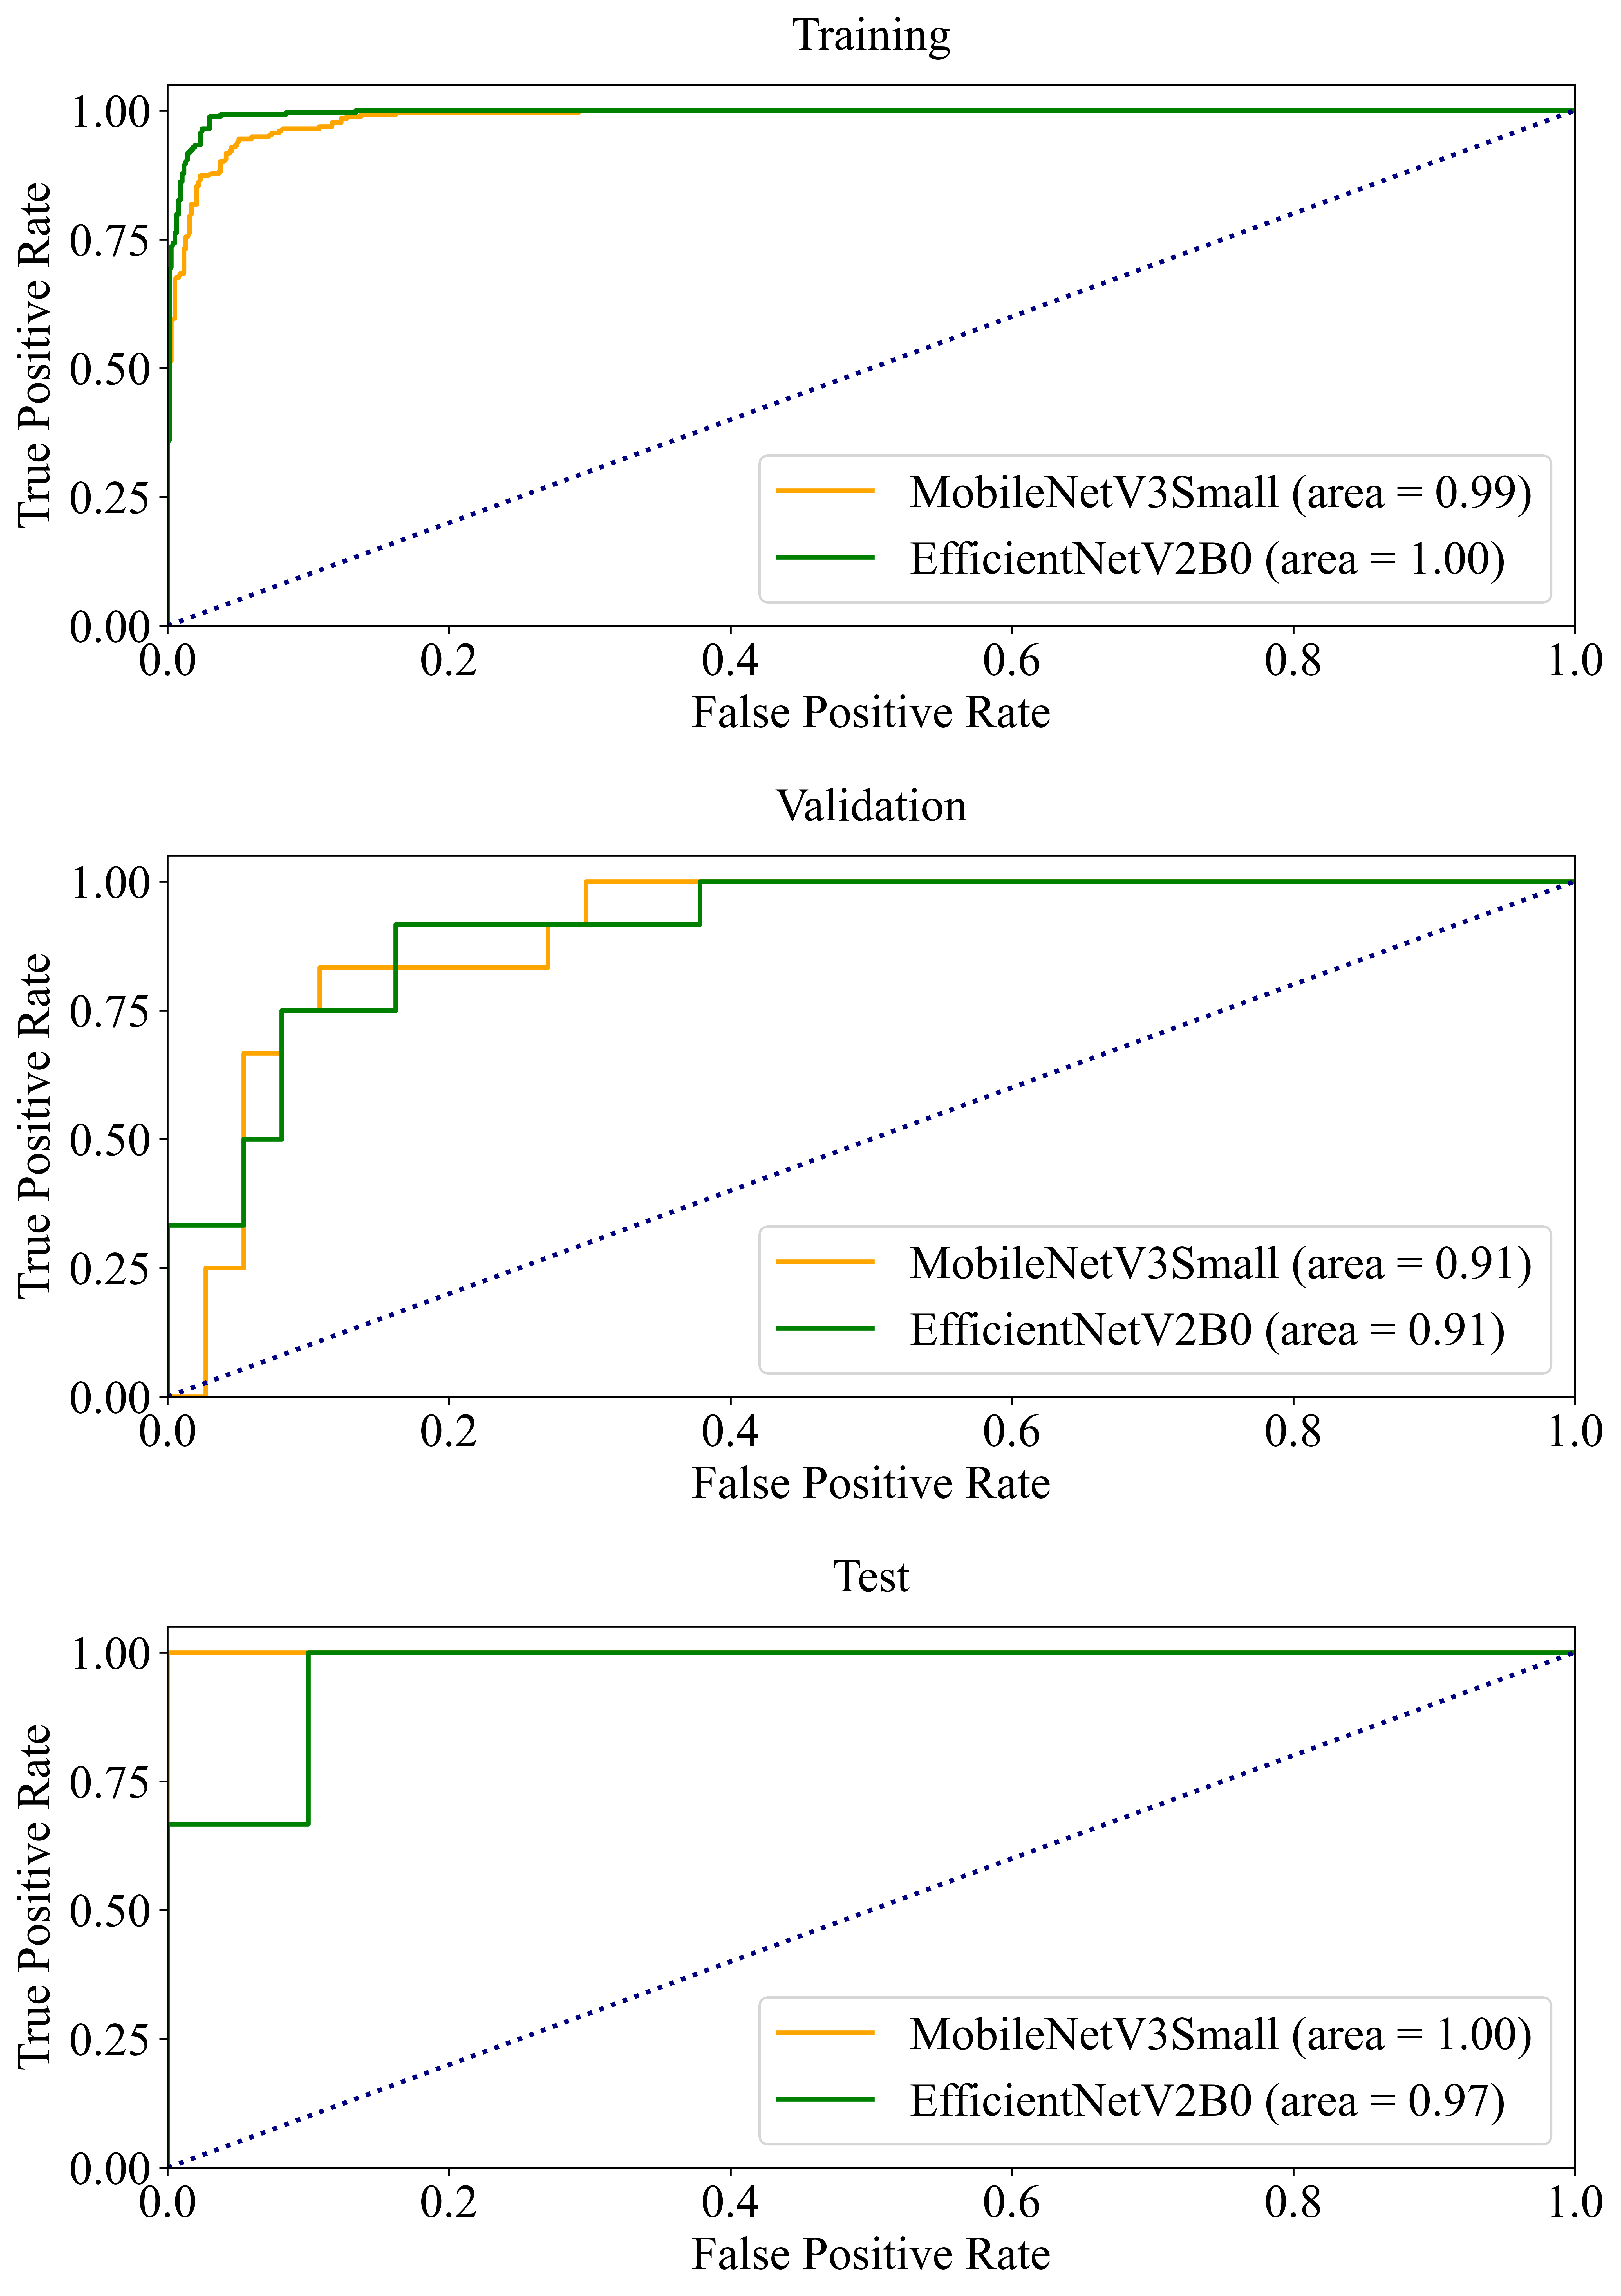

In [10]:
# Create auc-roc curve for each model
from sklearn.metrics import roc_curve, auc


mobilenet_train_fpr, mobilenet_train_tpr, _ = roc_curve(
    mobilenet_train_preds["actual"],
    mobilenet_train_preds["predicted"],
)

efficientnet_train_fpr, efficientnet_train_tpr, _ = roc_curve(
    efficientnet_train_preds["actual"],
    efficientnet_train_preds["predicted"],
)

mobilenet_valid_fpr, mobilenet_valid_tpr, _ = roc_curve(
    mobilenet_valid_preds["actual"],
    mobilenet_valid_preds["predicted"],
)

efficientnet_valid_fpr, efficientnet_valid_tpr, _ = roc_curve(
    efficientnet_valid_preds["actual"],
    efficientnet_valid_preds["predicted"],
)

mobilenet_test_fpr, mobilenet_test_tpr, _ = roc_curve(
    mobilenet_test_preds["actual"],
    mobilenet_test_preds["predicted"],
)

efficientnet_test_fpr, efficientnet_test_tpr, _ = roc_curve(
    efficientnet_test_preds["actual"],
    efficientnet_test_preds["predicted"],
)

mobilenet_train_roc_auc = auc(mobilenet_train_fpr, mobilenet_train_tpr)
efficientnet_train_roc_auc = auc(efficientnet_train_fpr, efficientnet_train_tpr)

mobilenet_valid_roc_auc = auc(mobilenet_valid_fpr, mobilenet_valid_tpr)
efficientnet_valid_roc_auc = auc(efficientnet_valid_fpr, efficientnet_valid_tpr)

mobilenet_test_roc_auc = auc(mobilenet_test_fpr, mobilenet_test_tpr)
efficientnet_test_roc_auc = auc(efficientnet_test_fpr, efficientnet_test_tpr)

# Plot auc-roc curve
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, dpi=600, figsize=(10, 14))
# make font bigger and axes readable
plt.rcParams["font.size"] = 20
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["axes.titlepad"] = 15


ax1.plot(
    mobilenet_train_fpr,
    mobilenet_train_tpr,
    color="orange",
    lw=2,
    label=f"MobileNetV3Small (area = {mobilenet_train_roc_auc:0.2f})",
)

ax1.plot(
    efficientnet_train_fpr,
    efficientnet_train_tpr,
    color="green",
    lw=2,
    label=f"EfficientNetV2B0 (area = {efficientnet_train_roc_auc:0.2f})",
)
ax1.legend(loc="lower right")
ax1.set_xlabel("False Positive Rate", fontname="Times New Roman", fontsize=20)
ax1.set_ylabel("True Positive Rate", fontname="Times New Roman", fontsize=20)
ax1.plot([0, 1], [0, 1], color="navy", lw=2, linestyle=":")
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_title("Training", fontname="Times New Roman", fontsize=20)
ax2.plot(
    mobilenet_valid_fpr,
    mobilenet_valid_tpr,
    color="orange",
    lw=2,
    label=f"MobileNetV3Small (area = {mobilenet_valid_roc_auc:0.2f})",
)

ax2.plot(
    efficientnet_valid_fpr,
    efficientnet_valid_tpr,
    color="green",
    lw=2,
    label=f"EfficientNetV2B0 (area = {efficientnet_valid_roc_auc:0.2f})",
)
ax2.legend(loc="lower right")
ax2.set_xlabel("False Positive Rate", fontname="Times New Roman", fontsize=20)
ax2.set_ylabel("True Positive Rate", fontname="Times New Roman", fontsize=20)
ax2.plot([0, 1], [0, 1], color="navy", lw=2, linestyle=":")
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_title("Validation", fontname="Times New Roman", fontsize=20)

ax3.plot(
    mobilenet_test_fpr,
    mobilenet_test_tpr,
    color="orange",
    lw=2,
    label=f"MobileNetV3Small (area = {mobilenet_test_roc_auc:0.2f})",
)

ax3.plot(
    efficientnet_test_fpr,
    efficientnet_test_tpr,
    color="green",
    lw=2,
    label=f"EfficientNetV2B0 (area = {efficientnet_test_roc_auc:0.2f})",
)
ax3.legend(loc="lower right")
ax3.set_xlabel("False Positive Rate", fontname="Times New Roman", fontsize=20)
ax3.set_ylabel("True Positive Rate", fontname="Times New Roman", fontsize=20)
ax3.plot([0, 1], [0, 1], color="navy", lw=2, linestyle=":")
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.05])
ax3.set_title("Test", fontname="Times New Roman", fontsize=20)

plt.tight_layout()
plt.show()

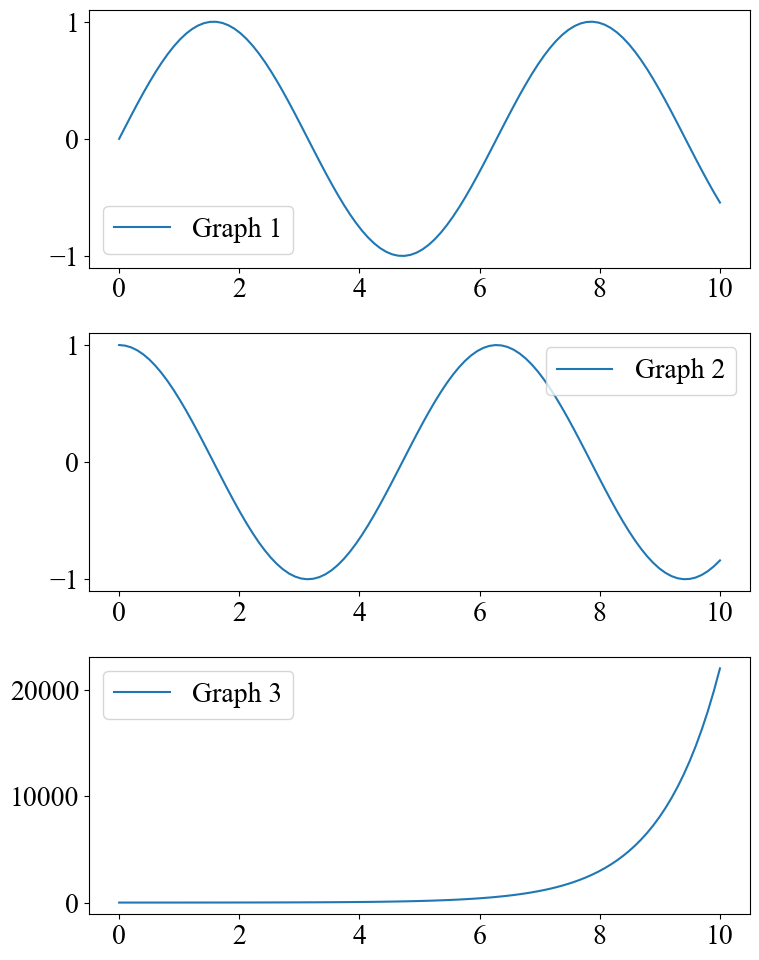

In [9]:
# Generate some data for the graphs
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.exp(x)

# Create a figure and axis objects
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

# Plot the first graph on the top left
axs[0].plot(x, y1, label="Graph 1")
axs[0].legend()

# Plot the second graph on the top right
axs[1].plot(x, y2, label="Graph 2")
axs[1].legend()

# Plot the third graph at the bottom
axs[2].plot(x, y3, label="Graph 3")
axs[2].legend()

# Add spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()